In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [8]:
data = pd.read_csv(r'C:\Users\Shailesh K Uday\Desktop\Python_workspace\Diwali_sales_data\Diwali Sales Data.csv', encoding = 'unicode_escape')


In [10]:
data.shape

(11251, 15)

In [11]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [14]:
data.drop(['Status','unnamed1'], axis=1, inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [16]:
pd.isnull(data)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
pd.isnull(data).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [20]:
#change data type
data['Amount'] = data['Amount'].astype('int')

In [21]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [25]:
data['Amount'].dtypes

dtype('int32')

In [27]:
#use describe() for specific columns
data[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender wise analysis

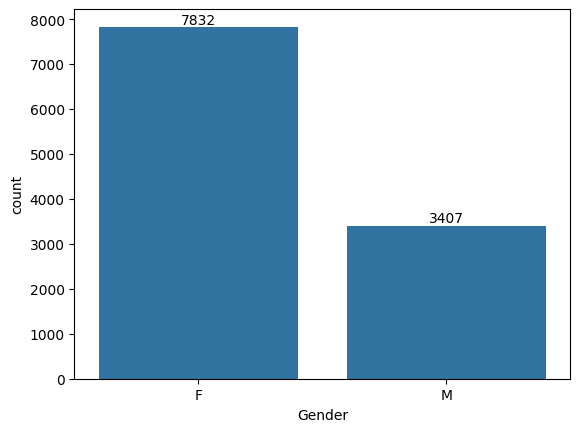

In [33]:
fig = sns.countplot(x = 'Gender',data = data)

for bars in fig.containers:
    fig.bar_label(bars)
 

In [34]:
data.groupby(['Gender'],as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

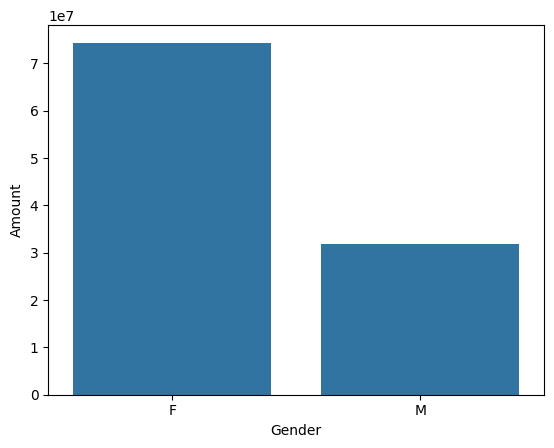

In [44]:
Gender_wise_sales=data.groupby(['Gender'],as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending=False)

 
sns.barplot(x = 'Gender', y = 'Amount', data = Gender_wise_sales)


In [45]:
# from above graph we can see that most of the buyers are females and even thpurchasing power of females are greater than man

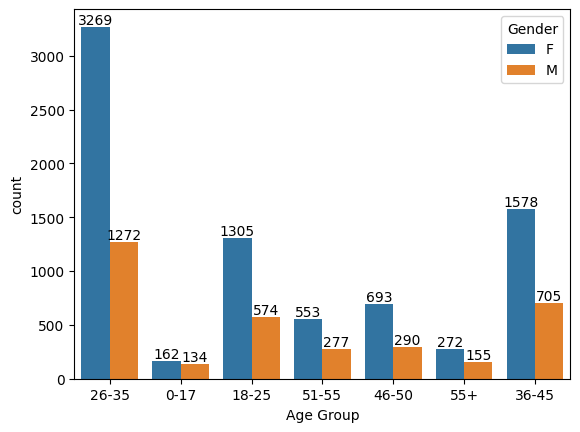

In [50]:
Age_sales = sns.countplot(data = data, x = 'Age Group', hue = 'Gender')

for bars in Age_sales.containers:
    Age_sales.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

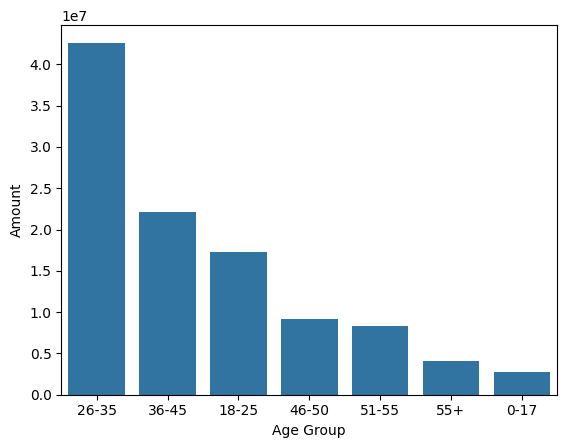

In [52]:
Age_wise_sales=data.groupby(['Age Group'],as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending=False)

 
sns.barplot(x = 'Age Group', y = 'Amount', data = Age_wise_sales)

In [ ]:
# State wise sales


<Axes: xlabel='State', ylabel='Orders'>

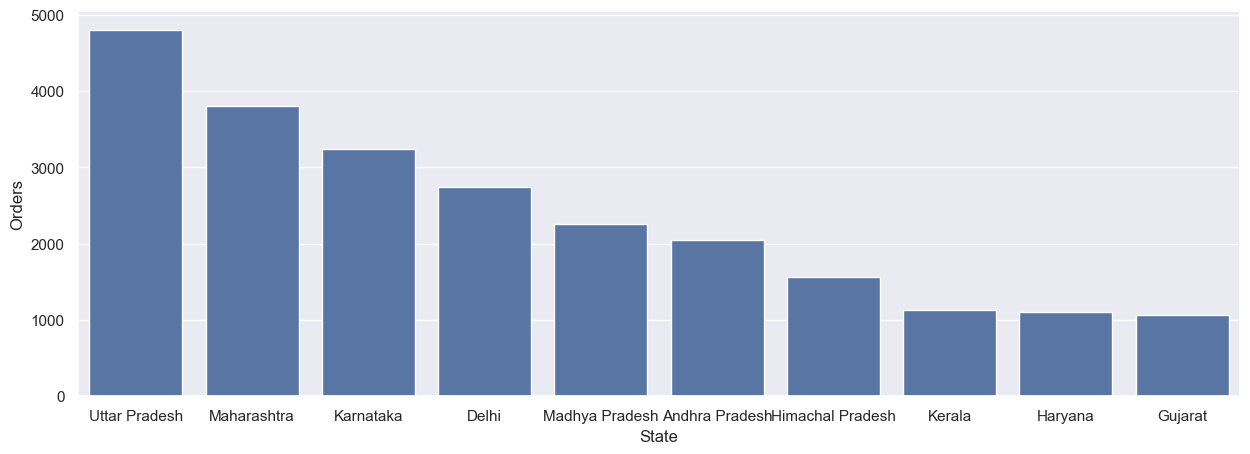

In [79]:
State_wise_sales =data.groupby(['State'],as_index= False)['Orders'].sum().sort_values(by= 'Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'State', y = 'Orders', data = State_wise_sales)

<Axes: xlabel='State', ylabel='Amount'>

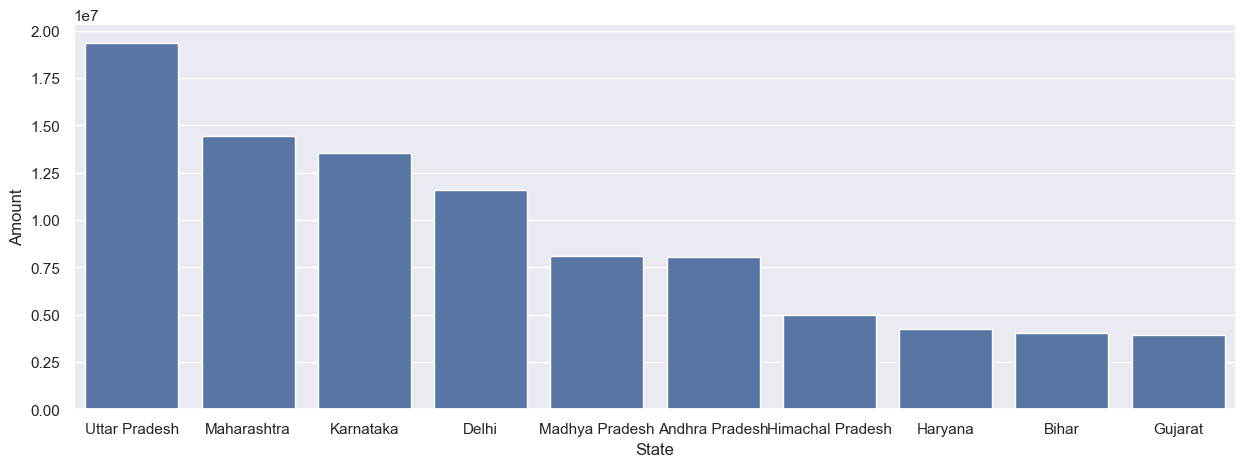

In [78]:
State_wise_sales =data.groupby(['State'],as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'State', y = 'Amount', data = State_wise_sales)

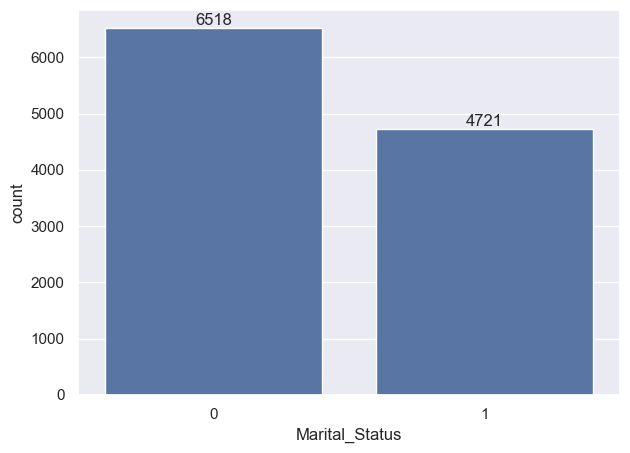

In [85]:
fig = sns.countplot(x = 'Marital_Status',data = data)

sns.set(rc={'figure.figsize':(5,5)})
for bars in fig.containers:
    fig.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

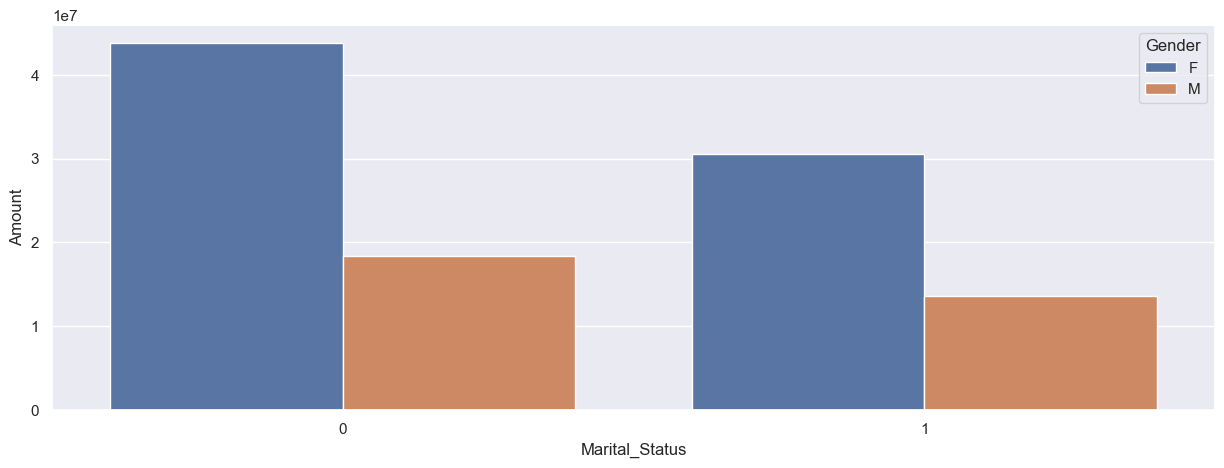

In [92]:
Marital_status_wise_sales =data.groupby(['Marital_Status','Gender'],as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'Marital_Status', y = 'Amount', hue= 'Gender',data = Marital_status_wise_sales)

## Occupation

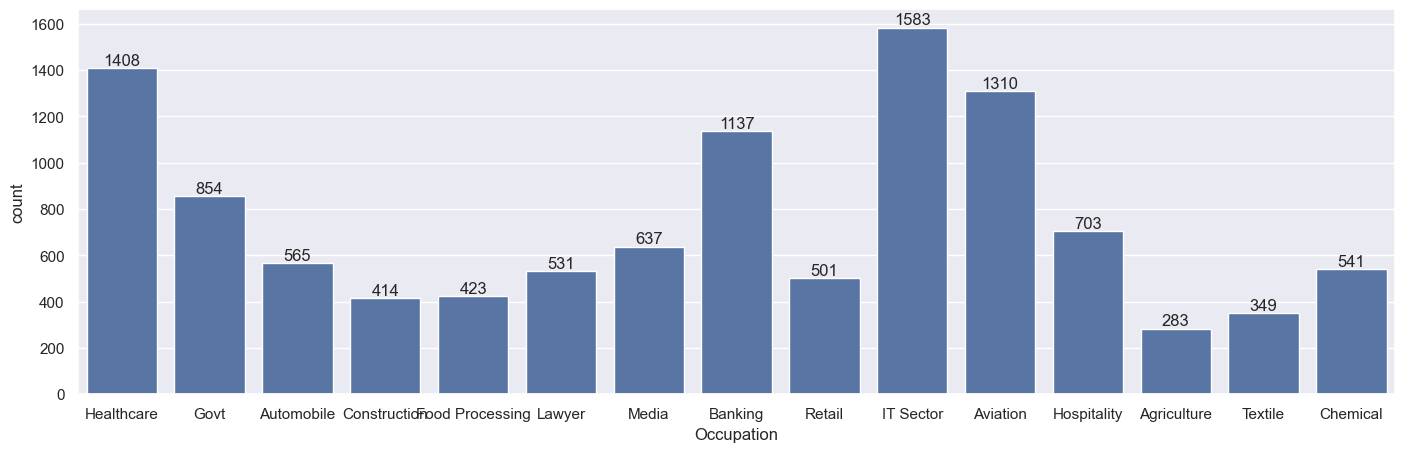

In [90]:
fig = sns.countplot(x = 'Occupation',data = data)

sns.set(rc={'figure.figsize':(25,5)})
for bars in fig.containers:
    fig.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

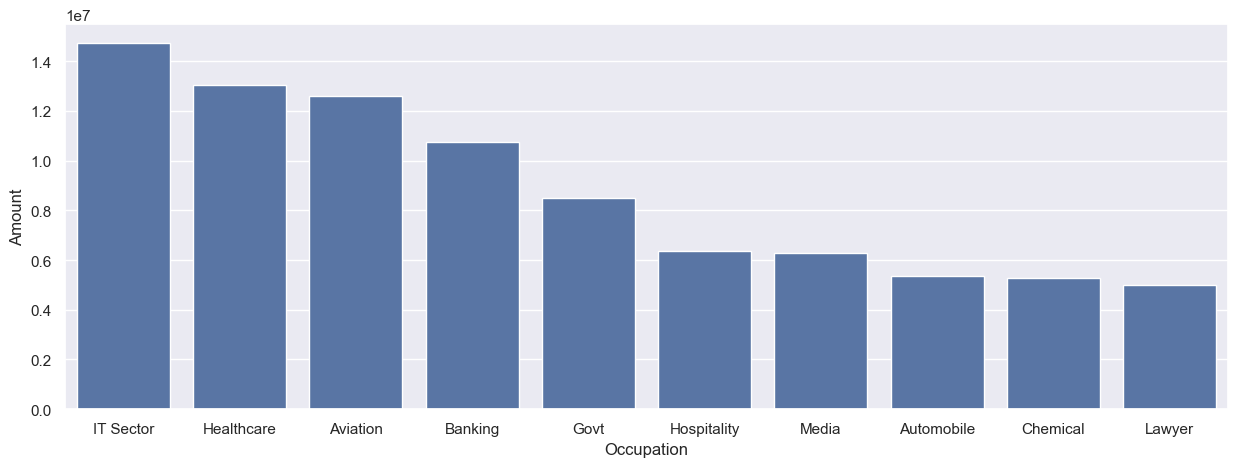

In [94]:
Occupation_wise_sales =data.groupby(['Occupation'],as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'Occupation', y = 'Amount',data = Occupation_wise_sales)

## Product Category

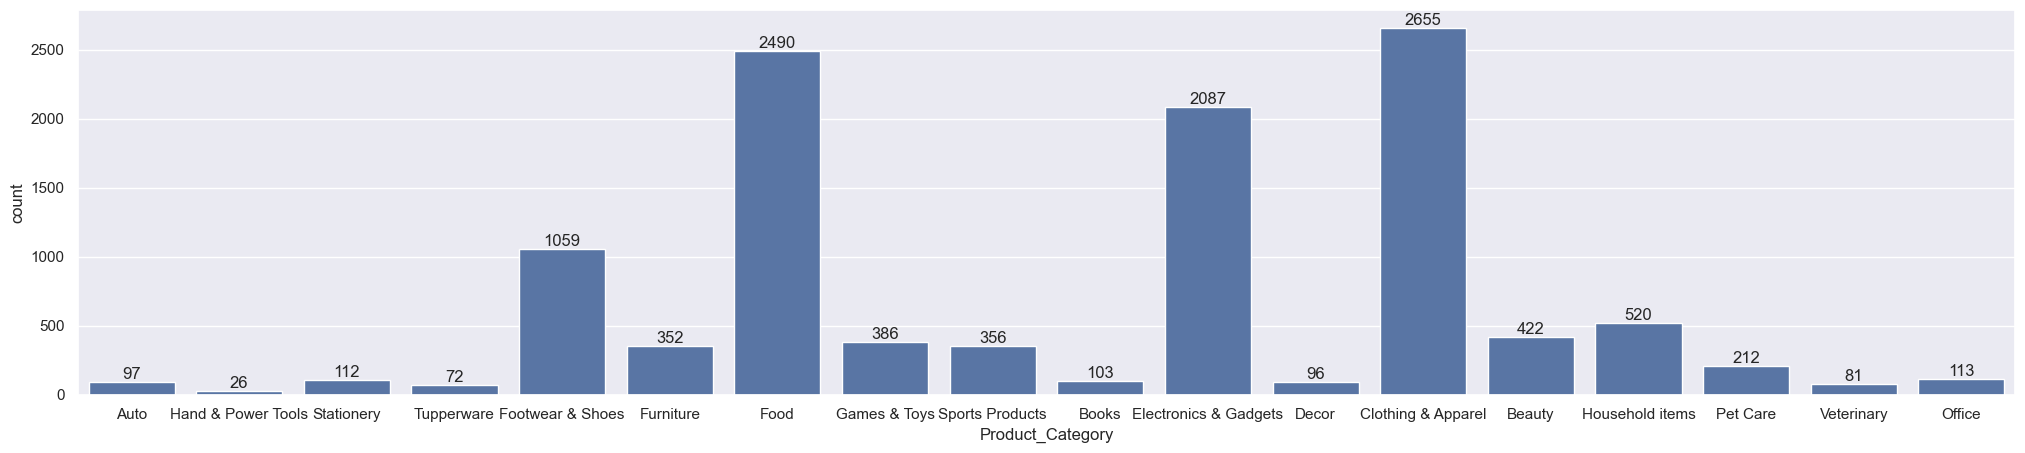

In [96]:
fig = sns.countplot(x = 'Product_Category',data = data)

sns.set(rc={'figure.figsize':(25,5)})
for bars in fig.containers:
    fig.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

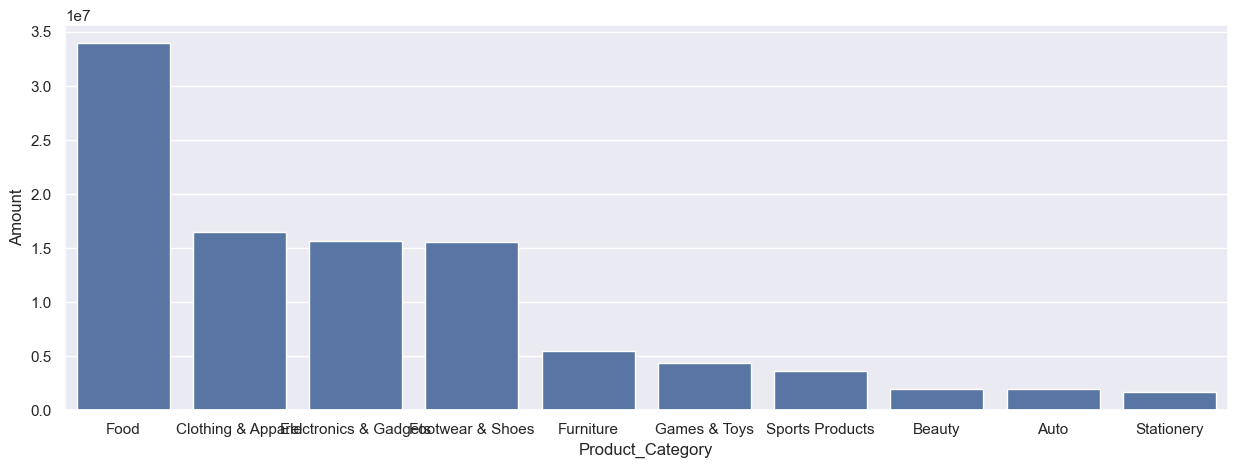

In [97]:
Occupation_wise_sales =data.groupby(['Product_Category'],as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'Product_Category', y = 'Amount',data = Occupation_wise_sales)

<Axes: xlabel='Product_ID', ylabel='Amount'>

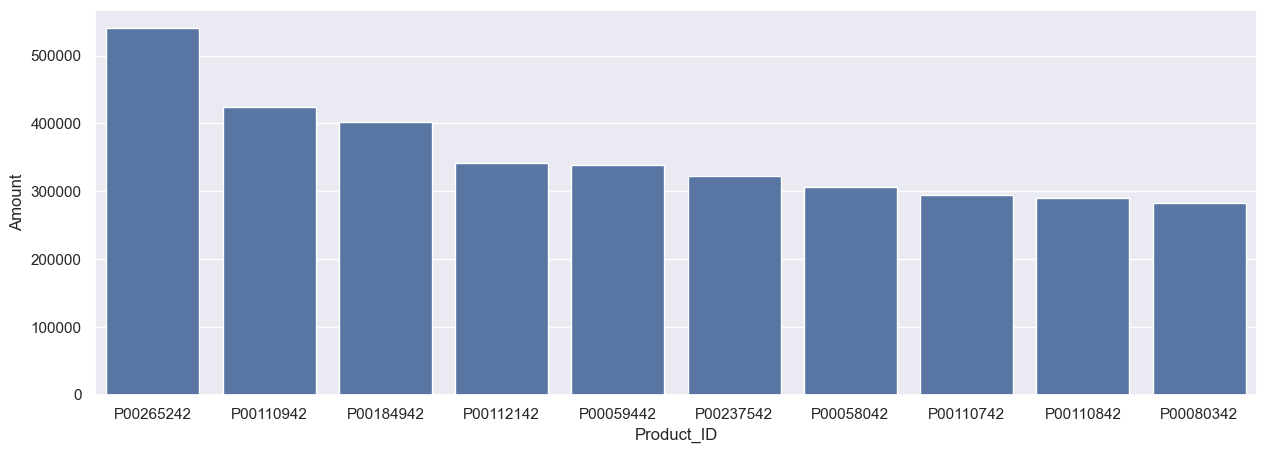

In [98]:
Occupation_wise_sales =data.groupby(['Product_ID'],as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'Product_ID', y = 'Amount',data = Occupation_wise_sales)